# Bangla Handwritten Digits Recognition
Using With Shallow Nural Network

*Dataset Source: [Bengali.ai](https://bengali.ai/)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
# Loading the dataset
X_train = pd.read_json('./dataset/train_images.json', ' ').to_numpy().T
Y_train = pd.read_json('./dataset/train_labels.json', ' ').to_numpy()
X_test = pd.read_json('./dataset/test_images.json', ' ').to_numpy().T
Y_test = pd.read_json('./dataset/test_labels.json', ' ').to_numpy()

# Setting up the label
ohe_y = OneHotEncoder()
Y_train = ohe_y.fit_transform(Y_train).toarray().T
Y_test = ohe_y.fit_transform(Y_test).toarray().T

# Checking the shape of the dataset
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Normalizing the dataset
X_test = X_test / 255
X_train = X_train / 255

(784, 23824)
(10, 23824)
(784, 2653)
(10, 2653)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


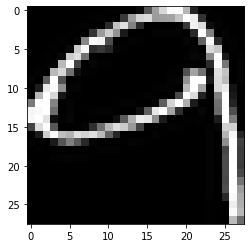

In [3]:
# Checking up some data
index = 123
temp_x_data = X_train.T[index].reshape(28, 28)
temp_y_data = Y_train.T[index]

plt.imshow(temp_x_data, cmap='gray')
print(temp_y_data)

In [4]:
# Getting shapes and sizes
m_train = Y_train.shape[1]
m_test = Y_test.shape[1]

# Size of input and output
n_x = X_test.shape[0]
n_y = Y_test.shape[0]

print('Number of training data: ' + str(m_train))
print('Number of testing data: ' + str(m_test))

print('Number of input params: ' + str(n_x))
print('Number of output params: ' + str(n_y))

Number of training data: 23824
Number of testing data: 2653
Number of input params: 784
Number of output params: 10


# It's time for my deep neural net class

Cost after iteration 0: 6.931472
Cost after iteration 200: 5.667906
Cost after iteration 400: 4.883490
Cost after iteration 600: 4.369612
Cost after iteration 800: 4.004267
Cost after iteration 1000: 3.725502
Cost after iteration 1200: 3.517108
Cost after iteration 1400: 3.381092
Cost after iteration 1600: 3.307170
Cost after iteration 1800: 3.272874
Cost after iteration 2000: 3.258604
Cost after iteration 2200: 3.253052
Cost after iteration 2400: 3.250973
Cost after iteration 2600: 3.250210
Cost after iteration 2800: 3.249933
Cost after iteration 3000: 3.249832
Cost after iteration 3200: 3.249795
Cost after iteration 3400: 3.249782
Cost after iteration 3600: 3.249777
Cost after iteration 3800: 3.249775
Cost after iteration 4000: 3.249774
Cost after iteration 4200: 3.249773
Cost after iteration 4400: 3.249773
Cost after iteration 4600: 3.249773
Cost after iteration 4800: 3.249773


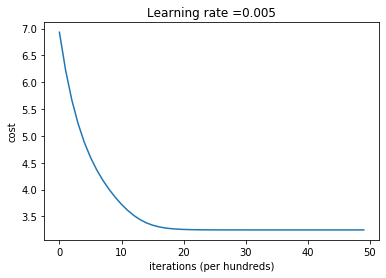

In [17]:
from NeuralNet import NeuralNetwork
classifier = NeuralNetwork([n_x, 64, 32, 16, n_y])
classifier.fit(X_train, Y_train, 0.005, 5000, 200, True)

Cost after iteration 0: 6.937808
Cost after iteration 200: 0.822503
Cost after iteration 400: 0.534360
Cost after iteration 600: 0.438058
Cost after iteration 800: 0.380176
Cost after iteration 1000: 0.339356
Cost after iteration 1200: 0.308034
Cost after iteration 1400: 0.282330
Cost after iteration 1600: 0.260530
Cost after iteration 1800: 0.241614
Cost after iteration 2000: 0.225182
Cost after iteration 2200: 0.210752
Cost after iteration 2400: 0.198011
Cost after iteration 2600: 0.186607
Cost after iteration 2800: 0.176293
Cost after iteration 3000: 0.166882
Cost after iteration 3200: 0.158249
Cost after iteration 3400: 0.150310
Cost after iteration 3600: 0.142957
Cost after iteration 3800: 0.136102
Cost after iteration 4000: 0.129678
Cost after iteration 4200: 0.123650
Cost after iteration 4400: 0.117969
Cost after iteration 4600: 0.112612
Cost after iteration 4800: 0.107557


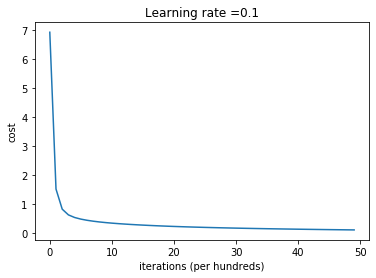

In [18]:
classifier2 = NeuralNetwork([n_x, 100, n_y])
classifier2.fit(X_train, Y_train, 0.1, 5000, 200, True)

Cost after iteration 0: 6.931480
Cost after iteration 200: 3.249769
Cost after iteration 400: 3.249768
Cost after iteration 600: 3.249766
Cost after iteration 800: 3.249765
Cost after iteration 1000: 3.249763
Cost after iteration 1200: 3.249760
Cost after iteration 1400: 3.249757
Cost after iteration 1600: 3.249753
Cost after iteration 1800: 3.249747
Cost after iteration 2000: 3.249738
Cost after iteration 2200: 3.249725
Cost after iteration 2400: 3.249704
Cost after iteration 2600: 3.249665
Cost after iteration 2800: 3.249576
Cost after iteration 3000: 3.249294
Cost after iteration 3200: 3.247243
Cost after iteration 3400: 2.849736
Cost after iteration 3600: 2.600848
Cost after iteration 3800: 2.412007
Cost after iteration 4000: 2.019703
Cost after iteration 4200: 1.660914
Cost after iteration 4400: 1.169088
Cost after iteration 4600: 0.702277
Cost after iteration 4800: 0.529911


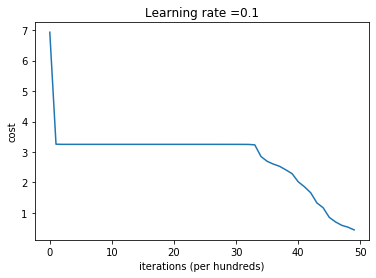

In [25]:
classifier3 = NeuralNetwork([n_x, 16, 32, 64, n_y])
classifier3.fit(X_train, Y_train, 0.1, 5000, 200, True)

(10, 2653)
Predicted:
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Actual Value:
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
98.41688654353563


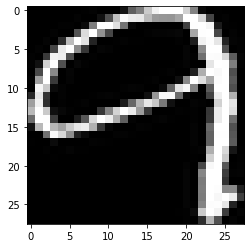

In [29]:
P_test = classifier3.predict(X_test)
P_test = (P_test == np.max(P_test, axis=0)) + np.zeros((10,1))
print(P_test.shape)
index = 323
print("Predicted:")
print(P_test.T[index])
print("Actual Value:")
print(Y_test.T[index])
plt.imshow(X_test.T[index].reshape(28,28), cmap='gray')

accuracy = np.equal(Y_test.T, P_test.T) + 0
score = np.sum(accuracy) / (accuracy.shape[0]*accuracy.shape[1]) * 100
print("score"score)